#Pandas and Numpy

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Load dataset using second row as header
df = pd.read_excel("/content/credit_card.xls", header=1)

# Drop useless ID column
df = df.drop(columns=['ID'])

# Convert all columns to numeric (fixes object dtype)
df = df.apply(pd.to_numeric, errors='coerce')

# Show info & head
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
df.isnull().sum()


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [38]:
df.shape

(30000, 24)

In [39]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [56]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [40]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [41]:
df.nunique()

,0
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11
PAY_5,10


In [42]:
df['AGE']

,AGE
0,24
1,26
2,34
3,37
4,57
...,...
29995,39
29996,43
29997,37
29998,41


In [45]:
df[df['AGE'] > 40]
df[(df['AGE'] > 40) & (df['BILL_AMT4']>2000)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
11,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
12,630000,2,2,2,41,-1,0,-1,-1,-1,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
17,320000,1,1,1,49,0,0,0,-1,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
28,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29983,20000,1,2,1,44,-2,-2,-2,-2,-2,...,2882,9235,1719,2890,2720,2890,9263,1824,1701,0
29990,140000,1,2,1,41,0,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [46]:
df.fillna(df.mean())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [51]:
df.groupby('SEX')['LIMIT_BAL'].mean()
print(df.groupby('AGE')['MARRIAGE'].mean())

AGE
21    1.880597
22    1.917857
23    1.905478
24    1.879326
25    1.870995
26    1.858280
27    1.834800
28    1.798439
29    1.793769
30    1.718280
31    1.669680
32    1.607945
33    1.584642
34    1.492255
35    1.453729
36    1.421480
37    1.349664
38    1.358051
39    1.332285
40    1.314943
41    1.288835
42    1.292191
43    1.316418
44    1.311429
45    1.244733
46    1.292982
47    1.285429
48    1.343348
49    1.269912
50    1.233577
51    1.288235
52    1.368421
53    1.286154
54    1.283401
55    1.287081
56    1.264045
57    1.295082
58    1.221311
59    1.325301
60    1.253731
61    1.250000
62    1.136364
63    1.161290
64    1.290323
65    1.250000
66    1.200000
67    1.187500
68    1.400000
69    1.000000
70    1.200000
71    1.000000
72    1.000000
73    1.000000
74    1.000000
75    1.000000
79    1.000000
Name: MARRIAGE, dtype: float64


#Matplotlib


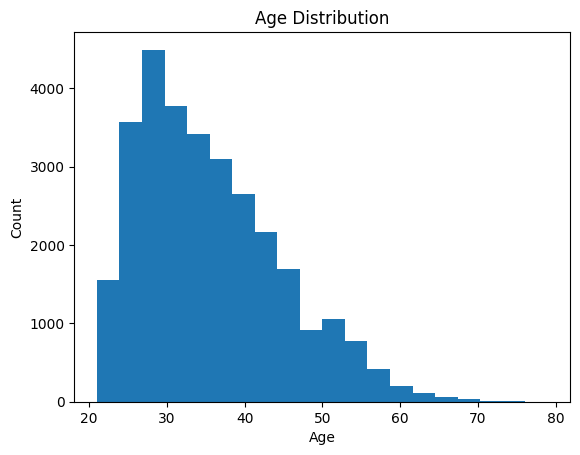

In [52]:
plt.hist(df['AGE'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

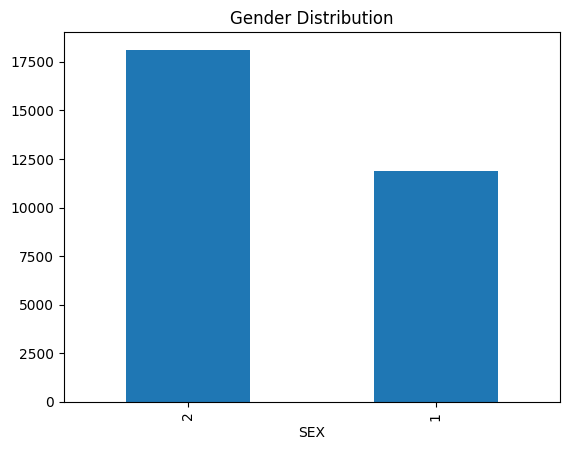

In [53]:
df['SEX'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()


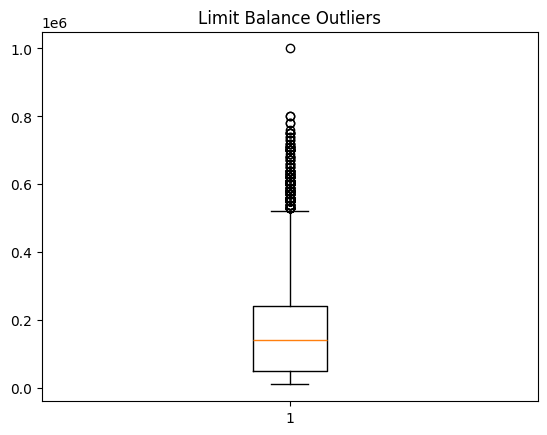

In [54]:
plt.boxplot(df['LIMIT_BAL'])
plt.title("Limit Balance Outliers")
plt.show()


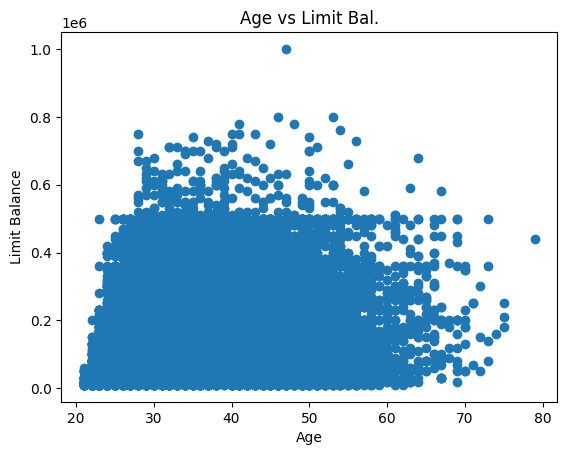

In [55]:
plt.scatter(df['AGE'], df['LIMIT_BAL'])
plt.xlabel('Age')
plt.ylabel('Limit Balance')
plt.title('Age vs Limit Bal.')
plt.show()


In [62]:
limit = df['LIMIT_BAL'].values
type(limit)
np.mean(limit)
np.median(limit)
np.std(limit)
np.min(limit)
np.max(limit)



np.int64(1000000)

In [63]:
high_limit = limit[limit > 200000]
len(high_limit)


9622

In [65]:
scaled_limit = (limit - np.mean(limit)) / np.std(limit)
print(scaled_limit)

[-1.13672015 -0.3659805  -0.59720239 ... -1.05964618 -0.67427636
 -0.90549825]


#Scipy


In [66]:
#Normality Test
stats.shapiro(df['LIMIT_BAL'].sample(500))


ShapiroResult(statistic=np.float64(0.9238310158008536), pvalue=np.float64(3.1746948976513262e-15))

In [67]:
# T test bw male and female limit balance
male = df[df['SEX']==1]['LIMIT_BAL']
female = df[df['SEX']==2]['LIMIT_BAL']
stats.ttest_ind(male, female)


TtestResult(statistic=np.float64(-4.288903937895566), pvalue=np.float64(1.8011800666712653e-05), df=np.float64(29998.0))

In [68]:
#Pearson Corr
stats.pearsonr(df['AGE'], df['LIMIT_BAL'])


PearsonRResult(statistic=np.float64(0.14471279755733601), pvalue=np.float64(4.355914983696581e-140))

In [70]:
# Chi sq Test( Sex vs Deafult)
contingency = pd.crosstab(df['SEX'], df['AGE'])
stats.chi2_contingency(contingency)


Chi2ContingencyResult(statistic=np.float64(336.26268802147274), pvalue=np.float64(5.197686763385375e-42), dof=55, expected_freq=array([[2.65498667e+01, 2.21909333e+02, 3.68924267e+02, 4.46592533e+02,
        4.69972267e+02, 4.97710933e+02, 5.85285867e+02, 5.58339733e+02,
        6.36008000e+02, 5.52792000e+02, 4.82256533e+02, 4.58876800e+02,
        4.54121600e+02, 4.60461867e+02, 4.41044800e+02, 4.39063467e+02,
        4.12513600e+02, 3.74075733e+02, 3.78038400e+02, 3.44752000e+02,
        3.26523733e+02, 3.14635733e+02, 2.65498667e+02, 2.77386667e+02,
        2.44496533e+02, 2.25872000e+02, 1.98529600e+02, 1.84660267e+02,
        1.79112533e+02, 1.62865600e+02, 1.34730667e+02, 1.20465067e+02,
        1.28786667e+02, 9.78778667e+01, 8.28197333e+01, 7.05354667e+01,
        4.83445333e+01, 4.83445333e+01, 3.28901333e+01, 2.65498667e+01,
        2.21909333e+01, 1.74357333e+01, 1.22842667e+01, 1.22842667e+01,
        9.51040000e+00, 9.90666667e+00, 6.34026667e+00, 1.98133333e+00,
        

In [71]:
# Skewness and Kurtosis

stats.skew(df['LIMIT_BAL'])
stats.kurtosis(df['LIMIT_BAL'])


np.float64(0.5359735300865474)

# EDA


In [72]:
df.corr()['default.payment.next.month'].sort_values(ascending=False)


KeyError: 'default.payment.next.month'

In [73]:
q1 = np.percentile(df['LIMIT_BAL'], 25)
q3 = np.percentile(df['LIMIT_BAL'], 75)
iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outliers = df[(df['LIMIT_BAL'] < lower) | (df['LIMIT_BAL'] > upper)]
len(outliers)


167

# Feature Engineering

In [74]:
df['BILL_RATIO'] = df['BILL_AMT1'] / df['LIMIT_BAL']
df['PAY_RATIO'] = df['PAY_AMT1'] / df['LIMIT_BAL']


In [75]:
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df = pd.get_dummies(df, columns=['SEX'], drop_first=True)


In [76]:
from sklearn.model_selection import train_test_split

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


KeyError: "['default.payment.next.month'] not found in axis"

In [77]:
df.to_csv("cleaned_creditcard.csv", index=False)
